<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Iowa Liquor Sales 

---

In this project, you will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in the first half of Project 2. 

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.set_option('display.max_columns', None)  

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
# check the iowa file location for your computer 
#iowa_file = '../../datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')
#df = pd.read_csv(iowa_file)
print "Dataframe is of size: " + str(df.values.nbytes / 10**6) + "MB"

Dataframe is of size: 39MB


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
# Look at column data types to make sure they are setup properly:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [4]:
# Havent used this data:
df.describe()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),Bottles Sold,Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.871285,8.981351,2.372830
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,24.040912,28.913690,7.638182
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,1.000000,0.100000,0.030000
25%,2604.000000,31.000000,1.012200e+06,115.00000,26827.000000,750.000000,2.000000,1.500000,0.400000
50%,3722.000000,62.000000,1.031200e+06,260.00000,38176.000000,750.000000,6.000000,5.250000,1.390000
75%,4378.000000,77.000000,1.062310e+06,380.00000,64573.000000,1000.000000,12.000000,10.500000,2.770000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,2508.000000,2508.000000,662.540000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

# Column Name Changes:
- Remove spaces from column names
- Remove parens from column names


In [5]:
# Edit col names to get rid of spaces and parens:
df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
df.rename(columns=lambda x: x.replace('(', ''), inplace=True)
df.rename(columns=lambda x: x.replace(')', ''), inplace=True)

In [6]:
# Verify:
cols = [col for col in df.columns]
print cols

['Date', 'Store_Number', 'City', 'Zip_Code', 'County_Number', 'County', 'Category', 'Category_Name', 'Vendor_Number', 'Item_Number', 'Item_Description', 'Bottle_Volume_ml', 'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_Liters', 'Volume_Sold_Gallons']


### 3.2 Clean the columns

## NULL Values:
- NULLs: 'Country Number', 'County', 'Category', 'Category Name'


In [7]:
# Drop NULL values and print out before and after dataframe shape:
df = df.dropna()

# Verify NULL Data removed:
df.isnull().sum()

Date                   0
Store_Number           0
City                   0
Zip_Code               0
County_Number          0
County                 0
Category               0
Category_Name          0
Vendor_Number          0
Item_Number            0
Item_Description       0
Bottle_Volume_ml       0
State_Bottle_Cost      0
State_Bottle_Retail    0
Bottles_Sold           0
Sale_Dollars           0
Volume_Sold_Liters     0
Volume_Sold_Gallons    0
dtype: int64

## Replace Bad Zip Codes:
- ValueError: Unable to parse string "712-2" at position 114


In [8]:
# Update Values with Correct Zip Code:
df.Zip_Code[df.Zip_Code == '712-2'] = 51529

## Floats to Ints:
- 'Country Number', 'Category'


In [9]:
# Floats to Int:
df['Category'] = df['Category'].astype('int64')
df['County_Number'] = df['County_Number'].astype('int64')
df['Zip_Code'] = df['Zip_Code'].astype('int64')


## Transform the Sales Columns to Floats:
- 'Sale_Dollars', 'State Bottle Cost', 'State Bottle Retail'


In [10]:
# State Bottle Types Bad:
df.Sale_Dollars = df.Sale_Dollars.map(lambda x: x.replace("$", ""))
df.State_Bottle_Cost = df.State_Bottle_Cost.map(lambda x: x.replace("$", ""))
df.State_Bottle_Retail = df.State_Bottle_Retail.map(lambda x: x.replace("$", ""))

# Fix:
df.Sale_Dollars = df.Sale_Dollars.astype('float64')
df.State_Bottle_Cost = df.State_Bottle_Cost.astype('float64')
df.State_Bottle_Retail = df.State_Bottle_Retail.astype('float64')

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

#### Ran out of time for this one.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


#### The data frame output below lists the number of months out of 2015 with recorded sales data. So, if a store had sales in 9 of 12 months you could analyze their sales numbers as 3/4 of 2015. 

## Add DateTime, Year, Month, Cost and Profit Columns:

In [11]:
# del df_time

In [12]:
# Create copy of the dataframe to play with 
df_time = df.copy()

# Create 2nd date column, which is 'datetime' to parse for time questions ('bgd' stands for 'brian gee date' - it stays):
df_time.insert(1, 'bgd', df_time.Date)
df_time['bgd'] = pd.to_datetime(df_time.bgd)

# Add columns for year/month
df_time.insert(2, 'Year', df_time.bgd.dt.year)
df_time.insert(3, 'Month', df_time.bgd.dt.month)

# Add Cost & Profit Columns
df_time.insert(19, 'Cost', df_time.State_Bottle_Cost * df_time.Bottles_Sold)
df_time.insert(20, 'Profit', df_time.Sale_Dollars - df_time.Cost)

## Stores Open in 2015 (Count of Months with a Sale per Store):

In [13]:
# Months 'Open' (Count of Unique Months with a Sale) per Store:
store_months_open_2015 = df_time[df_time.Year == 2015].groupby('Store_Number').Month.nunique()
store_months_open_2015.sample(15)

Store_Number
2836    10
5124     9
4473    12
4507     8
5024    11
3916    12
4233    12
5110     9
2205    12
4306    12
4878    12
4944     8
5103     9
5055     6
3631     8
Name: Month, dtype: int64

In [14]:
# Check Store 4812 == 3
#df_time[(df_time.Year == 2015) & (df_time.Store_Number == 4812)]['Month'].value_counts()
#df_time[(df_time.Year == 2015) & (df_time.Store_Number == 4812)]['Date'].sort_values(ascending=False)

## Add Booze Category Columns:

In [15]:
# Categorize Booze and Add Column:

df_time.loc[df_time.Category_Name.isin(['AMERICAN DRY GINS', 'IMPORTED DRY GINS','FLAVORED GINS','AMERICAN SLOE GINS']), 'Drink_Type'] = 'Gin'
df_time.loc[df_time.Category_Name.isin(['BLENDED WHISKIES','STRAIGHT BOURBON WHISKIES','CANADIAN WHISKIES','SINGLE BARREL BOURBON WHISKIES','TENNESSEE WHISKIES','WHISKEY LIQUEUR','JAPANESE WHISKY',
                                                    'BOTTLED IN BOND BOURBON','CORN WHISKIES','SCOTCH WHISKIES','IRISH WHISKIES','STRAIGHT RYE WHISKIES']), 'Drink_Type'] = 'Whiskey'
df_time.loc[df_time.Category_Name.isin(['VODKA 80 PROOF','IMPORTED VODKA','VODKA FLAVORED','100 PROOF VODKA','IMPORTED VODKA - MISC','OTHER PROOF VODKA','LOW PROOF VODKA']), 'Drink_Type'] = 'Vodka'
df_time.loc[df_time.Category_Name.isin(['Tequila', 'TEQUILA']), 'Drink_Type'] = 'Tequila'
df_time.loc[df_time.Category_Name.isin(['SINGLE MALT SCOTCH']), 'Drink_Type'] = 'Scotch'
df_time.loc[df_time.Category_Name.isin(['FLAVORED RUM','JAMAICA RUM','BARBADOS RUM','PUERTO RICO & VIRGIN ISLANDS RUM','SPICED RUM']), 'Drink_Type'] = 'Rum'
df_time.loc[df_time.Category_Name.isin(['HIGH PROOF BEER - AMERICAN']), 'Drink_Type'] = 'Beer'
df_time.loc[df_time.Category_Name.isin(['AMERICAN COCKTAILS', 'DISTILLED SPIRITS SPECIALTY', 'AMERICAN ALCOHOL', 'DECANTERS & SPECIALTY PACKAGES']), 'Drink_Type'] = 'Other'

df_time.loc[df_time.Category_Name.isin(['IMPORTED GRAPE BRANDIES','PEACH BRANDIES','APRICOT BRANDIES','AMERICAN GRAPE BRANDIES','CHERRY BRANDIES','BLACKBERRY BRANDIES','MISCELLANEOUS  BRANDIES']), 'Drink_Type'] = 'Brandy'

df_time.loc[df_time.Category_Name.isin(['SPEARMINT SCHNAPPS','RASPBERRY SCHNAPPS','IMPORTED SCHNAPPS','PEACH SCHNAPPS','STRAWBERRY SCHNAPPS','ROOT BEER SCHNAPPS','GRAPE SCHNAPPS','BUTTERSCOTCH SCHNAPPS',
                                                    'MISCELLANEOUS SCHNAPPS','TROPICAL FRUIT SCHNAPPS','CINNAMON SCHNAPPS','PEPPERMINT SCHNAPPS','APPLE SCHNAPPS','WATERMELON SCHNAPPS']), 'Drink_Type'] = 'Schnapps'

df_time.loc[df_time.Category_Name.isin(['CREAM LIQUEURS','TRIPLE SEC','AMERICAN AMARETTO','MISC. IMPORTED CORDIALS & LIQUEURS','MISC. AMERICAN CORDIALS & LIQUEURS','WHITE CREME DE MENTHE','WHITE CREME DE CACAO',
                                                    'COFFEE LIQUEURS','IMPORTED AMARETTO','ANISETTE','CREME DE ALMOND','ROCK & RYE','GREEN CREME DE MENTHE','AMARETTO - IMPORTED','DARK CREME DE CACAO']), 'Drink_Type'] = 'Liqueur'

In [16]:
df_time.head(3)

,Date,bgd,Year,Month,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Cost,Profit,Volume_Sold_Liters,Volume_Sold_Gallons,Drink_Type
0,11/04/2015,2015-11-04,2015,11,3717,SUMNER,50674,9,Bremer,1051100,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,54.00,27.00,9.0,2.38,Brandy
1,03/02/2016,2016-03-02,2016,3,2614,DAVENPORT,52807,82,Scott,1011100,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,27.50,13.76,1.5,0.40,Whiskey
2,02/11/2016,2016-02-11,2016,2,2106,CEDAR FALLS,50613,7,Black Hawk,1011200,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,302.16,151.20,24.0,6.34,Whiskey


## Filter data for only year 2015:

In [17]:
# Create df copy to filter:
df_2015 = df_time.copy()

# Subset df to only 2015
df_2015 = df_2015[df_2015.Year == 2015]

## Create Groups:

In [18]:
# Groups for ONLY 2015:
stores = df_2015.groupby('Store_Number')

# Groups per Store for ALL Times
stores_df_time = df_time.groupby('Store_Number')

## Create Summary Sales DataFrame (2015):

In [19]:
# Total Sales:
sales = stores['Sale_Dollars'].agg(sum)

# Cost:
cost = stores['Cost'].agg(sum)
#cost = df_2015.State_Bottle_Cost * df_2015.Bottles_Sold

# Profit: 
profit = stores['Profit'].agg(sum)

# Size 
size = stores['Bottles_Sold'].agg(sum)

# County:
county = stores['County'].agg(max)

# Gallons Sold 
gallons = stores['Volume_Sold_Gallons'].agg(sum)

In [20]:
# Add All Columns to Create Summary data frame:
sales_summary = pd.concat([county, sales, cost, profit, size, gallons], axis = 1)
sales_summary = sales_summary.rename(columns = {'Sale_Dollars': '2015_Sales', 'Cost': '2015_Cost', 
                                                'Profit': '2015_Profit',
                                                'Bottles_Sold' : '2015_Bottles_Sold',
                                                'Volume_Sold_Gallons' : '2015_Gallons_Sold'
                                               })
sales_summary.head(3)

,County,2015_Sales,2015_Cost,2015_Profit,2015_Bottles_Sold,2015_Gallons_Sold
Store_Number,,,,,,
2106,Black Hawk,146038.70,97296.50,48742.20,10355,2568.16
2113,Webster,9310.22,6201.18,3109.04,671,174.29
2130,Black Hawk,111583.91,74354.59,37229.32,7418,1817.48


## Stores by County:

##### I ran this query to confirm that each store belongs to one county. This is useful for the location based questions coming up. 

In [51]:
# Each store sells in exactly one county. 
scu = df_time.groupby('Store_Number').County.nunique()
#scu.sample(5)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [22]:
store_liquor_sales_2015 = sales_summary['2015_Sales']
store_liquor_sales_2015.head(10)

Store_Number
2106    146038.70
2113      9310.22
2130    111583.91
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2205     24623.01
2228     17462.07
Name: 2015_Sales, dtype: float64

### 5.2 Calculate the profit each store is making in 2015.


In [23]:
store_liquor_profit_2015 = sales_summary['2015_Profit']
store_liquor_profit_2015.head(10)

Store_Number
2106    48742.20
2113     3109.04
2130    37229.32
2152     2587.53
2178     8165.70
2190    40617.73
2191    41744.39
2200     7653.47
2205     8224.67
2228     5844.34
Name: 2015_Profit, dtype: float64

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [24]:
# Create 'County' Groups:
counties = sales_summary.groupby('County')

# Calculate per Gallon Profitability:
county_profitability = counties.sum()['2015_Profit'] / counties.sum()['2015_Gallons_Sold'] 
county_profitability.sort_values(ascending = False).head(10)

County
Dallas         21.156734
Johnson        20.530729
Polk           19.529814
Scott          19.354843
Jefferson      19.289829
Des Moines     18.952193
Woodbury       18.750669
Washington     18.701698
Buena Vista    18.635069
Marshall       18.547701
dtype: float64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

##### Didnt get to this one. 

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

##### Looks like profits are proportional to size. Line looks linear up and to the right. 

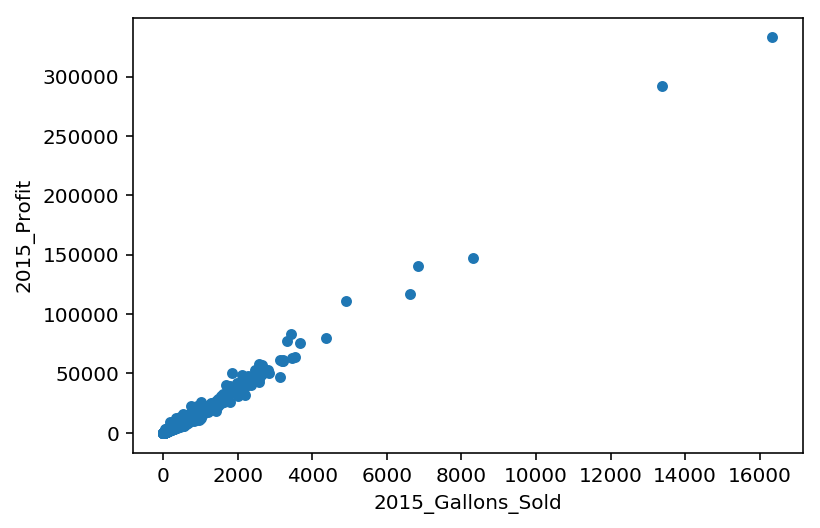

In [25]:
# Gallons Sold and Profits:
sales_summary.plot.scatter(x='2015_Gallons_Sold', y='2015_Profit');

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [26]:
# I did this above creating the summary data frame. 
# Counts by Drink Type:
df_time.Drink_Type.value_counts()

Whiskey     81755
Vodka       69690
Rum         32618
Liqueur     21528
Brandy      14978
Schnapps    14494
Tequila     12044
Other        9982
Gin          9882
Scotch       2285
Beer            2
Name: Drink_Type, dtype: int64

### 5.7 Do relationships exist between the broader liquor type and profit?

#### Scotch is highly profitable. Beer as a category is misleading. In 2015 there was less than a gallon sold in all of Iowa (according to the data). The profitability ratio above can't be used and beer as a drink type shouldn't be used in other questions. 

In [27]:
drink_type = df_time[df_time.Year == 2015].groupby('Drink_Type')
drink_type_profitability = drink_type['Profit'].sum() / drink_type['Volume_Sold_Gallons'].sum()
drink_type_profitability.sort_values(ascending = False)

Drink_Type
Beer        237.950000
Scotch       68.201012
Tequila      25.646314
Brandy       24.612344
Liqueur      23.533721
Whiskey      20.331610
Rum          17.582034
Gin          16.901294
Schnapps     16.378442
Vodka        14.340077
Other        12.669389
dtype: float64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

#### Only looked at most profitable items. Looks like specialty items top the list. 

In [28]:
# Most Popular Items: (Would Need to Add Sales/Cost Data)
items = df_time.groupby('Item_Description')
item_sales = items.sum()['Bottles_Sold'].sort_values(ascending=False)
item_sales.head(10)

Item_Description
Black Velvet                     147988
Hawkeye Vodka                    100230
Captain Morgan Spiced Rum         65586
Five O'clock Vodka                64230
Fireball Cinnamon Whiskey         58528
Barton Vodka                      48474
Mccormick Vodka Pet               47806
Jack Daniels Old #7 Black Lbl     45588
Smirnoff Vodka 80 Prf             38496
Mccormick Vodka                   35562
Name: Bottles_Sold, dtype: int64

In [29]:
# Most Popular Items: (Would Need to Add Sales/Cost Data)
items = df_time.groupby('Item_Description')
item_sales = items.sum()['Profit'].sort_values(ascending=False)
item_sales.head(10)

Item_Description
Black Velvet                     534977.44
Jack Daniels Old #7 Black Lbl    394928.32
Captain Morgan Spiced Rum        387436.82
Fireball Cinnamon Whiskey        304503.44
Crown Royal Canadian Whisky      267372.54
Hawkeye Vodka                    234586.88
Absolut Swedish Vodka 80 Prf     226014.75
Grey Goose Vodka                 202208.63
Jagermeister Liqueur             163473.67
Jameson                          163210.45
Name: Profit, dtype: float64

In [30]:
item_table = pd.pivot_table(df_time, index=['Item_Description', 'Drink_Type'], values=['Sale_Dollars','Profit'], aggfunc='mean')
item_table.sort_values('Sale_Dollars', ascending=False).head(10)

,,Profit,Sale_Dollars
Item_Description,Drink_Type,,
Cedar Ridge Single Malt Single Barrel Select,Scotch,4867.500000,14602.500000
Member's Mark Vodka,Vodka,1556.280000,4668.060000
Jim Beam Operation Homefront,Other,1417.885714,4252.114286
Member's Mark Spiced Rum,Rum,1304.640000,3913.920000
Medea Vodka,Vodka,1073.880000,3221.640000
Macallan FO 17year,Whiskey,721.320000,2163.960000
Crystal Malt 200ml,Whiskey,573.720000,1721.160000
Luxardo Maraschino,Liqueur,420.000000,1260.000000
Paradise Island Bay Rum,Rum,380.141667,1140.425000


### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [31]:
all_cities = df_time.groupby(['City', 'Drink_Type'])

#### Not to steal the suggestion from the question prompt, but looking at the most profitable City/Drink combinations, we see that 'Whiskey' and 'Vodka' are the most profitable and are served in larger (wealthier) cities. A blanket tax on 'Whiskey' or 'Vodka' gets around the explicity size/county concerns. Unless you're a Mom+Pop Store that sells Whiskey in Des Moines. 

In [32]:
all_cities.sum()['Profit'].sort_values(ascending=False).head(10)

City             Drink_Type
DES MOINES       Whiskey       437038.79
                 Vodka         393693.55
CEDAR RAPIDS     Whiskey       267240.09
                 Vodka         217674.92
DAVENPORT        Whiskey       170235.98
DES MOINES       Rum           153385.56
COUNCIL BLUFFS   Whiskey       153164.02
DAVENPORT        Vodka         147025.87
WEST DES MOINES  Whiskey       146670.25
SIOUX CITY       Whiskey       143032.07
Name: Profit, dtype: float64

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [33]:
# Filter dataframes for first quarters:
q1_2015 = (df_time.Year == 2015) & (df_time.Month.isin([1,2,3]))
q1_2016 = (df_time.Year == 2016) & (df_time.Month.isin([1,2,3]))

# Time Period Appropriate Data Frames:
q1_2015 = df_time[q1_2015]
q1_2016 = df_time[q1_2016]

# Create Masks for each Quarter:
stores_15 = q1_2015.groupby('Store_Number')
stores_16 = q1_2016.groupby('Store_Number')

# Create Sales Summary per Store/Quarter:
sales_15 = stores_15['Sale_Dollars'].agg(sum)
sales_16 = stores_16['Sale_Dollars'].agg(sum)

# Add to Main Summary Table:
sales_summary = pd.concat([sales_summary, sales_15], axis = 1)
sales_summary= sales_summary.rename(columns = {'Sale_Dollars': 'Q1_2015_Sales'})

sales_summary = pd.concat([sales_summary, sales_16], axis = 1)
sales_summary = sales_summary.rename(columns = {'Sale_Dollars': 'Q1_2016_Sales'})

In [34]:
sales_summary['Q1_2016_Sales'].head(3)

Store_Number
2106    30478.75
2113     2065.90
2130    27856.11
Name: Q1_2016_Sales, dtype: float64

#### Add Q1 15/16 Annual Growth Column:

In [35]:
sales_summary['Annual_Growth'] = (sales_summary['Q1_2016_Sales'] - sales_summary['Q1_2015_Sales']) / sales_summary['Q1_2015_Sales'] 

In [36]:
sales_summary.head()

,County,2015_Sales,2015_Cost,2015_Profit,2015_Bottles_Sold,2015_Gallons_Sold,Q1_2015_Sales,Q1_2016_Sales,Annual_Growth
Store_Number,,,,,,,,,
2106,Black Hawk,146038.70,97296.50,48742.20,10355.0,2568.16,39287.29,30478.75,-0.224208
2113,Webster,9310.22,6201.18,3109.04,671.0,174.29,2833.25,2065.90,-0.270837
2130,Black Hawk,111583.91,74354.59,37229.32,7418.0,1817.48,24272.57,27856.11,0.147637
2152,Cerro Gordo,7721.08,5133.55,2587.53,573.0,167.28,2003.46,904.66,-0.548451
2178,Allamakee,24324.18,16158.48,8165.70,1928.0,506.50,5856.41,5588.50,-0.045746


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

#### I created 'Brian_Growth_Metric.' It multiplies Q12016 Profit by year over year growth rate. Profit ensures an existing source of opportunity, while the growth rate suggests continuing expansion. 
#### Negative growth rates essentially remove the city from consideration. I didnt pick Des Moines despite the high growth metric; it is boosted by the very high profit figure despite having a small growth rate. 
#### I would recommend to our liquor store friend to have a higher growth component. 

In [37]:
idx = ['City']
vals = ['Profit', 'Cost', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_Gallons']

q1_15 = pd.pivot_table(q1_2015, index= idx, values= vals, aggfunc='sum')
q1_16 = pd.pivot_table(q1_2016, index= idx , values= vals, aggfunc='sum')

colnames = {'Bottles_Sold':'Bottles_Sold_16' , 'Cost':'Cost_16','Profit':'Profit_16', 'Sale_Dollars': 'Sale_Dollars_16', 'Volume_Sold_Gallons':'Volume_Sold_Gallons_16'}
q1_16.rename(columns=colnames, inplace=True)

yearly = pd.concat([q1_15, q1_16], axis=1)
yearly['Profit_Growth'] = (yearly['Profit_16'] - yearly['Profit']) / yearly['Profit']
yearly['Brian_Growth_Metric'] = yearly['Profit_16'] * yearly['Profit_Growth']

yearly[yearly.Profit_Growth.notnull()].sort_values('Profit_16', ascending=False).head()

,Bottles_Sold,Cost,Profit,Sale_Dollars,Volume_Sold_Gallons,Bottles_Sold_16,Cost_16,Profit_16,Sale_Dollars_16,Volume_Sold_Gallons_16,Profit_Growth,Brian_Growth_Metric
DES MOINES,60398.0,508853.32,255004.29,763857.61,12646.82,64302.0,531337.92,266039.35,797377.27,13322.82,0.043274,11512.591375
CEDAR RAPIDS,35775.0,303765.46,152450.23,456215.69,7929.81,33148.0,278775.18,139633.30,418408.48,7556.64,-0.084073,-11739.373773
DAVENPORT,25168.0,181754.90,91178.45,272933.35,4628.53,29224.0,201568.03,100920.51,302488.54,5806.65,0.106846,10782.960926
COUNCIL BLUFFS,15857.0,144080.74,72253.50,216334.24,3766.23,17279.0,164920.98,82551.80,247472.78,4101.51,0.142530,11766.117931
SIOUX CITY,16503.0,147597.70,74086.40,221684.10,3991.63,17550.0,161365.29,81026.76,242392.05,4315.02,0.093679,7590.527871


In [38]:
yearly[yearly.Profit_Growth.notnull()].sort_values('Brian_Growth_Metric', ascending=False).head()

,Bottles_Sold,Cost,Profit,Sale_Dollars,Volume_Sold_Gallons,Bottles_Sold_16,Cost_16,Profit_16,Sale_Dollars_16,Volume_Sold_Gallons_16,Profit_Growth,Brian_Growth_Metric
OKOBOJI,1.0,7.47,3.74,11.21,0.13,96.0,629.84,315.14,944.98,23.50,83.262032,26239.196791
MOUNT VERNON,1918.0,21512.12,10774.79,32286.91,483.84,4345.0,38041.60,19054.95,57096.55,1140.43,0.768475,14643.258457
ORANGE CITY,459.0,3984.00,1997.54,5981.54,124.97,1256.0,11908.45,6177.80,18086.25,501.22,2.092704,12928.306932
DENISON,1367.0,12510.45,6270.34,18780.79,351.42,2586.0,23749.09,12356.23,36105.32,919.46,0.970584,11992.755831
COUNCIL BLUFFS,15857.0,144080.74,72253.50,216334.24,3766.23,17279.0,164920.98,82551.80,247472.78,4101.51,0.142530,11766.117931


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

#### I'd pick Davenport or Council Bluffs. They are among the leaders in q12016 profitability and have high year over year growth rates. Also, they have high enough volume to suggest their performance isnt a fluke. 

In [39]:
# Sorted by Q12016 Profit:
yearly[yearly.Profit_Growth.notnull()].sort_values('Profit_16', ascending=False).head()

,Bottles_Sold,Cost,Profit,Sale_Dollars,Volume_Sold_Gallons,Bottles_Sold_16,Cost_16,Profit_16,Sale_Dollars_16,Volume_Sold_Gallons_16,Profit_Growth,Brian_Growth_Metric
DES MOINES,60398.0,508853.32,255004.29,763857.61,12646.82,64302.0,531337.92,266039.35,797377.27,13322.82,0.043274,11512.591375
CEDAR RAPIDS,35775.0,303765.46,152450.23,456215.69,7929.81,33148.0,278775.18,139633.30,418408.48,7556.64,-0.084073,-11739.373773
DAVENPORT,25168.0,181754.90,91178.45,272933.35,4628.53,29224.0,201568.03,100920.51,302488.54,5806.65,0.106846,10782.960926
COUNCIL BLUFFS,15857.0,144080.74,72253.50,216334.24,3766.23,17279.0,164920.98,82551.80,247472.78,4101.51,0.142530,11766.117931
SIOUX CITY,16503.0,147597.70,74086.40,221684.10,3991.63,17550.0,161365.29,81026.76,242392.05,4315.02,0.093679,7590.527871


#### Mount Vernon is an interesting pick, but given the low bottles_sold volume I'd pass for a higher volume location.

In [40]:
# Sorted by 'Brian_Growth_Metric':
yearly[yearly.Profit_Growth.notnull()].sort_values('Brian_Growth_Metric', ascending=False).head()

,Bottles_Sold,Cost,Profit,Sale_Dollars,Volume_Sold_Gallons,Bottles_Sold_16,Cost_16,Profit_16,Sale_Dollars_16,Volume_Sold_Gallons_16,Profit_Growth,Brian_Growth_Metric
OKOBOJI,1.0,7.47,3.74,11.21,0.13,96.0,629.84,315.14,944.98,23.50,83.262032,26239.196791
MOUNT VERNON,1918.0,21512.12,10774.79,32286.91,483.84,4345.0,38041.60,19054.95,57096.55,1140.43,0.768475,14643.258457
ORANGE CITY,459.0,3984.00,1997.54,5981.54,124.97,1256.0,11908.45,6177.80,18086.25,501.22,2.092704,12928.306932
DENISON,1367.0,12510.45,6270.34,18780.79,351.42,2586.0,23749.09,12356.23,36105.32,919.46,0.970584,11992.755831
COUNCIL BLUFFS,15857.0,144080.74,72253.50,216334.24,3766.23,17279.0,164920.98,82551.80,247472.78,4101.51,0.142530,11766.117931


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
    #### Whiskey
    
2. Should the recommended location change if he is only selling one type of liquor?
    #### Council Bluffs is still a profitable location. However, selling Whiskey in Sioux City is a better choice. Also, if the big city is desireable, Vodka in Des Moines is a great choice.

In [41]:
# Adding 'Drink_Type' to previous data frame construction:
idx = ['City', 'Drink_Type']
vals = ['Profit', 'Cost', 'Bottles_Sold', 'Sale_Dollars', 'Volume_Sold_Gallons']

q1_15 = pd.pivot_table(q1_2015, index= idx, values= vals, aggfunc='sum')
q1_16 = pd.pivot_table(q1_2016, index= idx , values= vals, aggfunc='sum')

colnames = {'Bottles_Sold':'Bottles_Sold_16' , 'Cost':'Cost_16','Profit':'Profit_16', 'Sale_Dollars': 'Sale_Dollars_16', 'Volume_Sold_Gallons':'Volume_Sold_Gallons_16'}
q1_16.rename(columns=colnames, inplace=True)

yearly = pd.concat([q1_15, q1_16], axis=1)
yearly['Profit_Growth'] = (yearly['Profit_16'] - yearly['Profit']) / yearly['Profit']
yearly['Brian_Growth_Metric'] = yearly['Profit_16'] * yearly['Profit_Growth']

In [42]:
# Total Profit Sort:
yearly[yearly.Profit_Growth.notnull()].sort_values('Profit_16', ascending=False).head(10)

Bottles_Sold       Cost    Profit  Sale_Dollars  \
City            Drink_Type                                                    
DES MOINES      Whiskey          15137.0  155438.65  77826.00     233264.65   
                Vodka            18886.0  122014.39  61276.67     183291.06   
CEDAR RAPIDS    Whiskey          10395.0  107712.84  54110.47     161823.31   
COUNCIL BLUFFS  Whiskey           5351.0   62128.29  31135.37      93263.66   
CEDAR RAPIDS    Vodka            10861.0   72872.78  36614.80     109487.58   
SIOUX CITY      Whiskey           4588.0   43311.48  21694.65      65006.13   
DAVENPORT       Whiskey           6292.0   56166.99  28170.68      84337.67   
                Vodka             7774.0   39466.31  19809.66      59275.97   
WEST DES MOINES Vodka             4562.0   39546.50  20168.67      59715.17   
DES MOINES      Rum               6997.0   64272.71  32226.82      96499.53   

                            Volume_Sold_Gallons  Bottles_Sold_16    Cost_16  \
City            Drink_Type                                                    
DES MOINES      Whiskey                 3332.64          16650.0  156874.30   
                Vodka                   3799.79          21837.0  154159.91   
CEDAR RAPIDS    Whiskey                 2300.88           9171.0   88425.04   
COUNCIL BLUFFS  Whiskey                 1329.57           6499.0   73723.30   
CEDAR RAPIDS    Vodka                   2426.30          10406.0   70972.80   
SIOUX CITY      Whiskey                 1133.62           6430.0   68175.05   
DAVENPORT       Whiskey                 1236.70           6899.0   56627.18   
                Vodka                   1362.33           9925.0   54330.32   
WEST DES MOINES Vodka                   1327.64           5874.0   53811.64   
DES MOINES      Rum                     1716.75           6267.0   51453.52   

                            Profit_16  Sale_Dollars_16  \
City            Drink_Type                               
DES MOINES      Whiskey      78590.72        235465.02   
                Vodka        77159.76        231319.67   
CEDAR RAPIDS    Whiskey      44355.73        132780.77   
COUNCIL BLUFFS  Whiskey      36915.90        110639.20   
CEDAR RAPIDS    Vodka        35528.56        106501.36   
SIOUX CITY      Whiskey      34358.96        102534.01   
DAVENPORT       Whiskey      28351.71         84978.89   
                Vodka        27209.46         81539.78   
WEST DES MOINES Vodka        26929.27         80740.91   
DES MOINES      Rum          25740.25         77193.77   

                            Volume_Sold_Gallons_16  Profit_Growth  \
City            Drink_Type                                          
DES MOINES      Whiskey                    3472.93       0.009826   
                Vodka                      4525.98       0.259203   
CEDAR RAPIDS    Whiskey                    2059.89      -0.180275   
COUNCIL BLUFFS  Whiskey                    1559.87       0.185658   
CEDAR RAPIDS    Vodka                      2415.36      -0.029667   
SIOUX CITY      Whiskey                    1718.91       0.583753   
DAVENPORT       Whiskey                    1324.64       0.006426   
                Vodka                      2022.26       0.373545   
WEST DES MOINES Vodka                      1470.71       0.335203   
DES MOINES      Rum                        1518.25      -0.201279   

                            Brian_Growth_Metric  
City            Drink_Type                       
DES MOINES      Whiskey              772.234156  
                Vodka              20000.032842  
CEDAR RAPIDS    Whiskey            -7996.208750  
COUNCIL BLUFFS  Whiskey             6853.731542  
CEDAR RAPIDS    Vodka              -1054.014852  
SIOUX CITY      Whiskey            20057.134857  
DAVENPORT       Whiskey              182.193332  
                Vodka              10163.958498  
WEST DES MOINES Vodka               9026.773841  
DES MOINES      Rum                -5180.962113

In [43]:
# Brian_Growth_Metric:
yearly[yearly.Profit_Growth.notnull()].sort_values('Brian_Growth_Metric', ascending=False).head(5)

,,Bottles_Sold,Cost,Profit,Sale_Dollars,Volume_Sold_Gallons,Bottles_Sold_16,Cost_16,Profit_16,Sale_Dollars_16,Volume_Sold_Gallons_16,Profit_Growth,Brian_Growth_Metric
City,Drink_Type,,,,,,,,,,,,
PELLA,Rum,145.0,1209.42,605.07,1814.49,40.60,535.0,8911.79,4456.11,13367.90,233.07,6.364619,28361.442237
ORANGE CITY,Whiskey,106.0,1203.98,602.27,1806.25,27.94,803.0,7584.18,4013.98,11598.16,333.26,5.664752,22738.199986
SIOUX CITY,Whiskey,4588.0,43311.48,21694.65,65006.13,1133.62,6430.0,68175.05,34358.96,102534.01,1718.91,0.583753,20057.134857
DES MOINES,Vodka,18886.0,122014.39,61276.67,183291.06,3799.79,21837.0,154159.91,77159.76,231319.67,4525.98,0.259203,20000.032842
COUNCIL BLUFFS,Rum,1709.0,12837.32,6445.44,19282.76,353.27,2759.0,28732.44,14370.98,43103.42,772.94,1.229635,17671.063082


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


#### Looks like people drink more during summer and especially during the holidays.

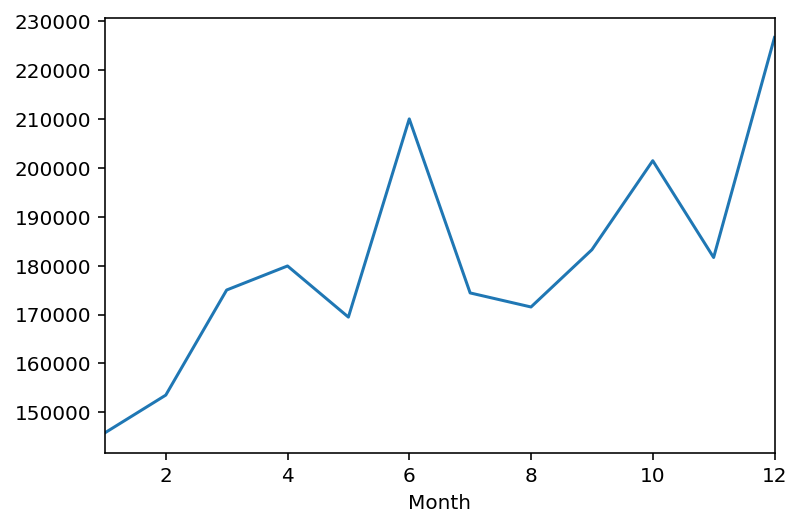

In [44]:
bottles = df_time[df_time['Year'] == 2015].groupby('Month')['Bottles_Sold'].sum()
bottles.plot()

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

#### The Whiskey will cost 792K and it will take 99 to break even.

In [45]:
# Sioux City - Whiskey:
scw = df_time[(df_time['City'] == 'SIOUX CITY') & (df_time['Drink_Type'] == 'Whiskey')]
scw.head(2)

,Date,bgd,Year,Month,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Cost,Profit,Volume_Sold_Liters,Volume_Sold_Gallons,Drink_Type
52,01/28/2015,2015-01-28,2015,1,2623,SIOUX CITY,51104,97,Woodbury,1012200,SCOTCH WHISKIES,260,5290,J & B Rare Scotch,750,12.25,18.38,2,36.76,24.5,12.26,1.5,0.40,Whiskey
239,06/24/2015,2015-06-24,2015,6,3820,SIOUX CITY,51103,97,Woodbury,1012100,CANADIAN WHISKIES,260,10803,Crown Royal Regal Apple Mini,300,7.35,11.03,2,22.06,14.7,7.36,0.6,0.16,Whiskey


In [46]:
# Calculate Whiskey Cost:
w = scw.groupby('Drink_Type') 
whiskey_cost = (w.sum()['Cost'] / w.sum()['Volume_Sold_Gallons']) * 20000
print 'The cost of the whiskey is: ${}'.format(round(whiskey_cost.Whiskey))

The cost of the whiskey is: $792784.0


In [47]:
# Get monthly average profit:
m = scw.groupby(['Year','Month'])
monthly_profit = m.sum()['Profit']
monthly_profit

Year  Month
2015  1         4854.95
      2         9279.09
      3         7560.61
      4         8015.02
      5         7242.47
      6        12144.23
      7         6259.79
      8         7719.97
      9         9455.95
      10        9490.27
      11       11731.71
      12       14919.05
2016  1         9225.88
      2        14079.37
      3        11053.71
Name: Profit, dtype: float64

In [48]:
# Months to Break Even:
startup_costs = whiskey_cost.Whiskey + 150000
breakeven_months = startup_costs / (monthly_profit.sum() / len(monthly_profit))
print 'The breakeven period is the following number of months: {}'.format(round(breakeven_months))

The breakeven period is the following number of months: 99.0


In [49]:
# Raw Data - Sioux City / Whiskey:
scw.head()

,Date,bgd,Year,Month,Store_Number,City,Zip_Code,County_Number,County,Category,Category_Name,Vendor_Number,Item_Number,Item_Description,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Sale_Dollars,Cost,Profit,Volume_Sold_Liters,Volume_Sold_Gallons,Drink_Type
52,01/28/2015,2015-01-28,2015,1,2623,SIOUX CITY,51104,97,Woodbury,1012200,SCOTCH WHISKIES,260,5290,J & B Rare Scotch,750,12.25,18.38,2,36.76,24.50,12.26,1.5,0.40,Whiskey
239,06/24/2015,2015-06-24,2015,6,3820,SIOUX CITY,51103,97,Woodbury,1012100,CANADIAN WHISKIES,260,10803,Crown Royal Regal Apple Mini,300,7.35,11.03,2,22.06,14.70,7.36,0.6,0.16,Whiskey
280,10/28/2015,2015-10-28,2015,10,4452,SIOUX CITY,51105,97,Woodbury,1011300,TENNESSEE WHISKIES,85,26824,Jack Daniels Old #7 Black Lbl Square,375,6.77,10.16,24,243.84,162.48,81.36,9.0,2.38,Whiskey
583,11/18/2015,2015-11-18,2015,11,3447,SIOUX CITY,51106,97,Woodbury,1011300,TENNESSEE WHISKIES,85,26586,Gentleman Jack,750,20.01,30.02,12,360.24,240.12,120.12,9.0,2.38,Whiskey
750,12/16/2015,2015-12-16,2015,12,4588,SIOUX CITY,51103,97,Woodbury,1081600,WHISKEY LIQUEUR,421,64866,Fireball Cinnamon Whiskey,750,8.98,13.47,12,161.64,107.76,53.88,9.0,2.38,Whiskey


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?

In [50]:
##### Didnt Get To